# Exploratory Data Analysis (EDA) of International football matches and goals 1916-2025

This notebook explores goal-scoring patterns across international football matches over time.  
We analyze which teams scored the most, when they scored, and how goal patterns vary across minutes, teams, and match context (home/away, penalty, own goals, etc.).

## Contents

- [1. Dataset Overview](#Dataset-Overview)  
- [2. Indivudal Players](#Indivudal-Players)
- - [2.1 Players consistency over years](#Players-consistency-over-years)
- [3. Get Matches details](#Get-Matches-details)  
- [4. Create New DataFrame for Nations Performance](#Create-New-DataFrame-for-Nations-Performance)  
- [5. Insights & Observations](#Insights)
- - [5.1 Nations Performance](#Nations-Performance)
- - [5.2 Most Dramatic Matches](#Most-Dramatic-Matches)

# Dataset Overview

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('goalscorers.csv')

In [3]:
data

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
44442,2025-07-02,United States,Guatemala,United States,Diego Luna,15.0,False,False
44443,2025-07-02,United States,Guatemala,Guatemala,Olger Escobar,80.0,False,False
44444,2025-07-06,United States,Mexico,United States,Chris Richards,4.0,False,False
44445,2025-07-06,United States,Mexico,Mexico,Raúl Jiménez,27.0,False,False


# Indivudal Players

In [4]:
# Top scorer
data['scorer'].value_counts().head(10)

scorer
Cristiano Ronaldo      108
Robert Lewandowski      63
Romelu Lukaku           60
Harry Kane              58
Lionel Messi            55
Edin Džeko              50
Ali Daei                49
Miroslav Klose          48
Aleksandar Mitrović     47
Luis Suárez             47
Name: count, dtype: int64

<Axes: xlabel='scorer'>

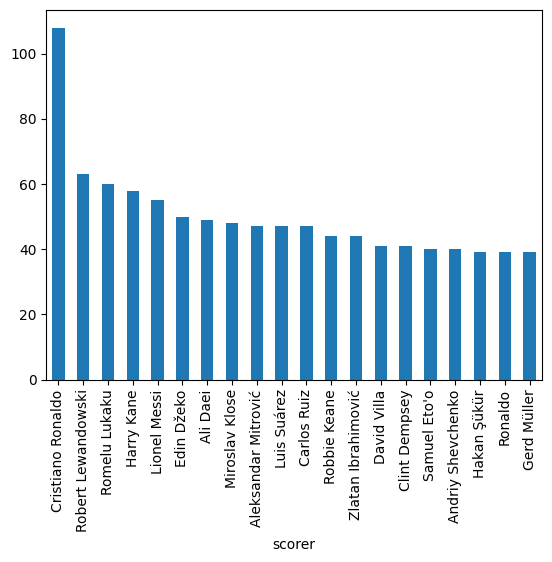

In [5]:
data['scorer'].value_counts().head(20).plot(kind='bar')

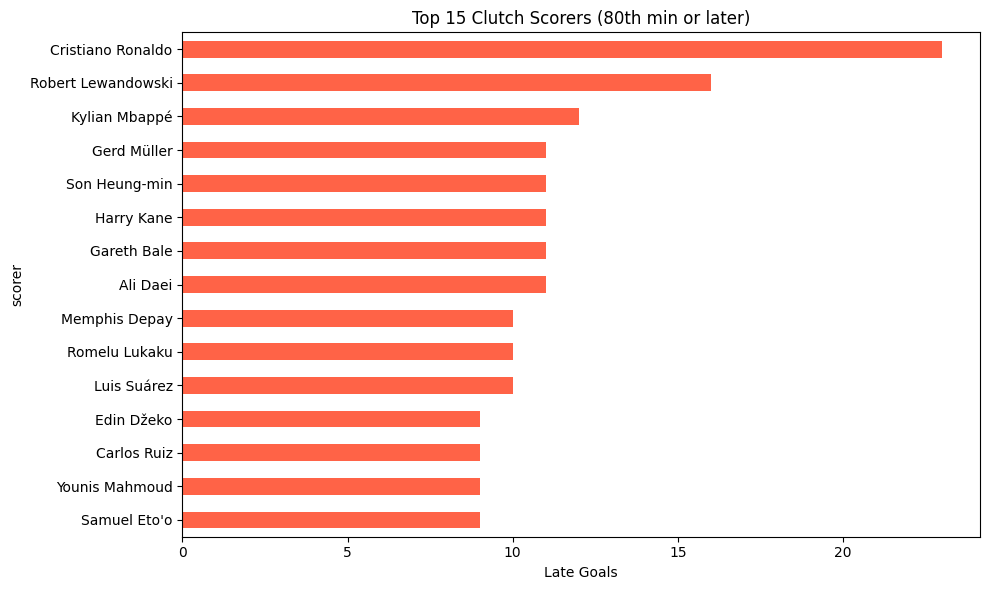

In [6]:
# Clutch scorers (goals scored at or after 80th minute)
clutch_goals = data[data['minute'] >= 80]
clutch_top = clutch_goals['scorer'].value_counts().head(15)

plt.figure(figsize=(10, 6))
clutch_top.plot(kind='barh', color='tomato')
plt.title('Top 15 Clutch Scorers (80th min or later)')
plt.xlabel('Late Goals')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

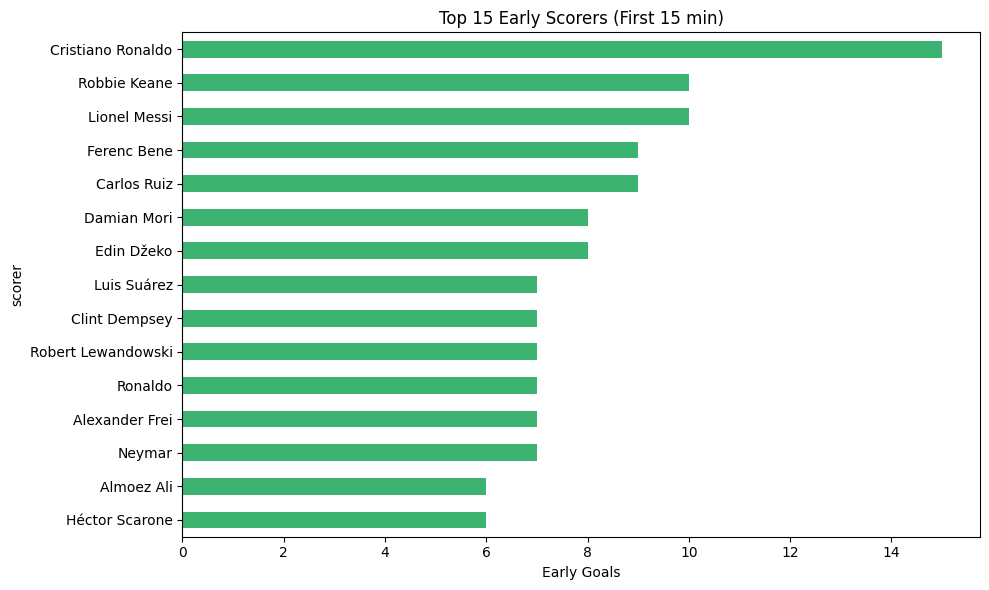

In [7]:
# Early scorers (first 15 minutes)
early_goals = data[data['minute'] <= 15]
early_top = early_goals['scorer'].value_counts().head(15)

plt.figure(figsize=(10, 6))
early_top.plot(kind='barh', color='mediumseagreen')
plt.title('Top 15 Early Scorers (First 15 min)')
plt.xlabel('Early Goals')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [8]:
# Penalty Scorers
penalty_goals = data[data['penalty'] == True]
penalty_scorers = penalty_goals['scorer'].value_counts().head(10)
penalty_scorers

scorer
Harry Kane            20
Cristiano Ronaldo     19
Lionel Messi          14
Hristo Stoichkov      13
Robert Lewandowski    13
Cuauhtémoc Blanco     11
Mile Jedinak          11
Landon Donovan        10
Robbie Keane          10
Christian Eriksen     10
Name: count, dtype: int64

In [9]:
# Own Goal Sufferers
own_goals = data[data['own_goal'] == True]
own_goal_scorers = own_goals['scorer'].value_counts()
own_goal_scorers.head()

scorer
Walid Abbas       3
Ján Ďurica        3
Roberto Ayala     3
Raio Piiroja      3
Rashad Sadygov    3
Name: count, dtype: int64

In [10]:
# Average Scoring Time per Player
data['minute'] = pd.to_numeric(data['minute'], errors='coerce')
avg_minute = data.groupby('scorer')['minute'].mean().round(0).reset_index()
avg_minute = avg_minute.dropna().sort_values('minute') 
avg_minute.head()

,scorer,minute
5699,Ion Pârcălab,1.0
12130,Segundo Villadóniga,1.0
5605,Igor Picușceac,1.0
1239,Antonio López Guerrero,1.0
10922,Qasim Said,1.0


In [11]:
print(avg_minute[avg_minute['scorer'] == 'Cristiano Ronaldo'], '\n')
print(avg_minute[avg_minute['scorer'] == 'Lionel Messi'])

                 scorer  minute
2615  Cristiano Ronaldo    53.0 

            scorer  minute
8007  Lionel Messi    46.0


In [12]:
# Count total goals scored by each player
goal_counts = data['scorer'].value_counts().reset_index()
goal_counts.columns = ['scorer', 'total_goals']

# Merge average scoring minute with total goals per player
avg_minute = avg_minute.merge(goal_counts, on='scorer')

# Get top 20 players with the highest total goals
top_players = avg_minute.sort_values('total_goals', ascending=False).head(40)

# Preview the merged DataFrame
avg_minute.head()

,scorer,minute,total_goals
0,Ion Pârcălab,1.0,1
1,Segundo Villadóniga,1.0,1
2,Igor Picușceac,1.0,1
3,Antonio López Guerrero,1.0,1
4,Qasim Said,1.0,1


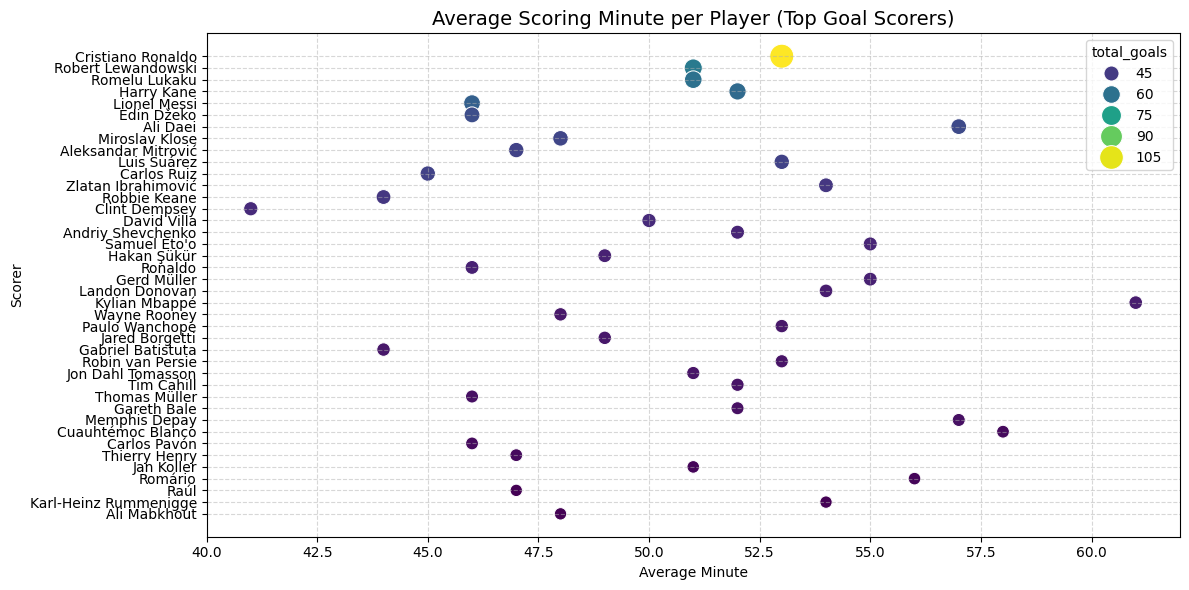

In [13]:
# plotting teams killer scatter plot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=top_players,
    x='minute',
    y='scorer',
    hue='total_goals',
    palette='viridis', 
    size='total_goals',
    sizes=(80, 300),   
    legend='brief'
)

plt.title('Average Scoring Minute per Player (Top Goal Scorers)', fontsize=14)
plt.xlabel('Average Minute')
plt.ylabel('Scorer')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:
# Hat-trick Machines
# Step 1: Identify all matches where a player scored 3 or more goals
hat_tricks_df = (
    data.groupby(['date', 'scorer'])   # Group by match date and player
    .size()                            # Count goals per player per match
    .reset_index(name='goals_in_match')
    .query('goals_in_match >= 3')      # Filter only hat-trick or more
)

# Step 2: Count how many times each player scored a hat-trick or more
hat_trick_counts = (
    hat_tricks_df
    .groupby('scorer')
    .size()
    .reset_index(name='hat_trick_times')  # Number of matches with 3+ goals
    .sort_values('hat_trick_times', ascending=False)
)

# Display the result
hat_trick_counts.head()

,scorer,hat_trick_times
138,Cristiano Ronaldo,10
632,Robert Lewandowski,6
288,Harry Kane,5
141,Damian Mori,5
735,Vaughan Coveny,5


In [15]:
# Teams Killer
data['opponent'] = data.apply(
    lambda row: row['away_team'] if row['team'] == row['home_team'] else row['home_team'],
    axis=1
)

team_killers = (
    data.groupby(['scorer', 'opponent'])
    .size()
    .reset_index(name='goals_against')
    .sort_values('goals_against', ascending=False)
)

team_killers.head(10)

,scorer,opponent,goals_against
3003,Archie Thompson,American Samoa,13
5984,Cristiano Ronaldo,Luxembourg,10
16805,Karim Bagheri,Maldives,9
10401,Gary Cole,Fiji,9
13620,Iván Zamorano,Venezuela,9
14937,John Bosman,Cyprus,9
5377,Chris Wood,Solomon Islands,9
31215,Vaughan Coveny,Vanuatu,9
1210,Aleksandar Mitrović,Lithuania,8
18130,Landon Donovan,Cuba,8


### Players consistency over years

In [16]:
# Player scoring activity by year
# Extract year from 'date' column
data['year'] = pd.to_datetime(data['date']).dt.year

# Get top 15 scorers overall
top_15_scorers = data['scorer'].value_counts().head(15).index

# Filter data for only top 15 scorers
top_scorers_data = data[data['scorer'].isin(top_15_scorers)]

# Find the earliest year among top scorers
min_year = top_scorers_data['year'].min()

# Group and pivot the data by (year, scorer)
scorer_year = data.groupby(['year', 'scorer']).size().unstack(fill_value=0)

# Keep only top 15 scorers' columns
scorer_year = scorer_year[top_15_scorers]

# Filter rows starting from the first year a top scorer scored
scorer_year = scorer_year[scorer_year.index >= min_year]

In [17]:
scorer_year.head()

scorer,Cristiano Ronaldo,Robert Lewandowski,Romelu Lukaku,Harry Kane,Lionel Messi,Edin Džeko,Ali Daei,Miroslav Klose,Aleksandar Mitrović,Luis Suárez,Carlos Ruiz,Robbie Keane,Zlatan Ibrahimović,David Villa,Clint Dempsey
year,,,,,,,,,,,,,,,
1993,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0
1994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0


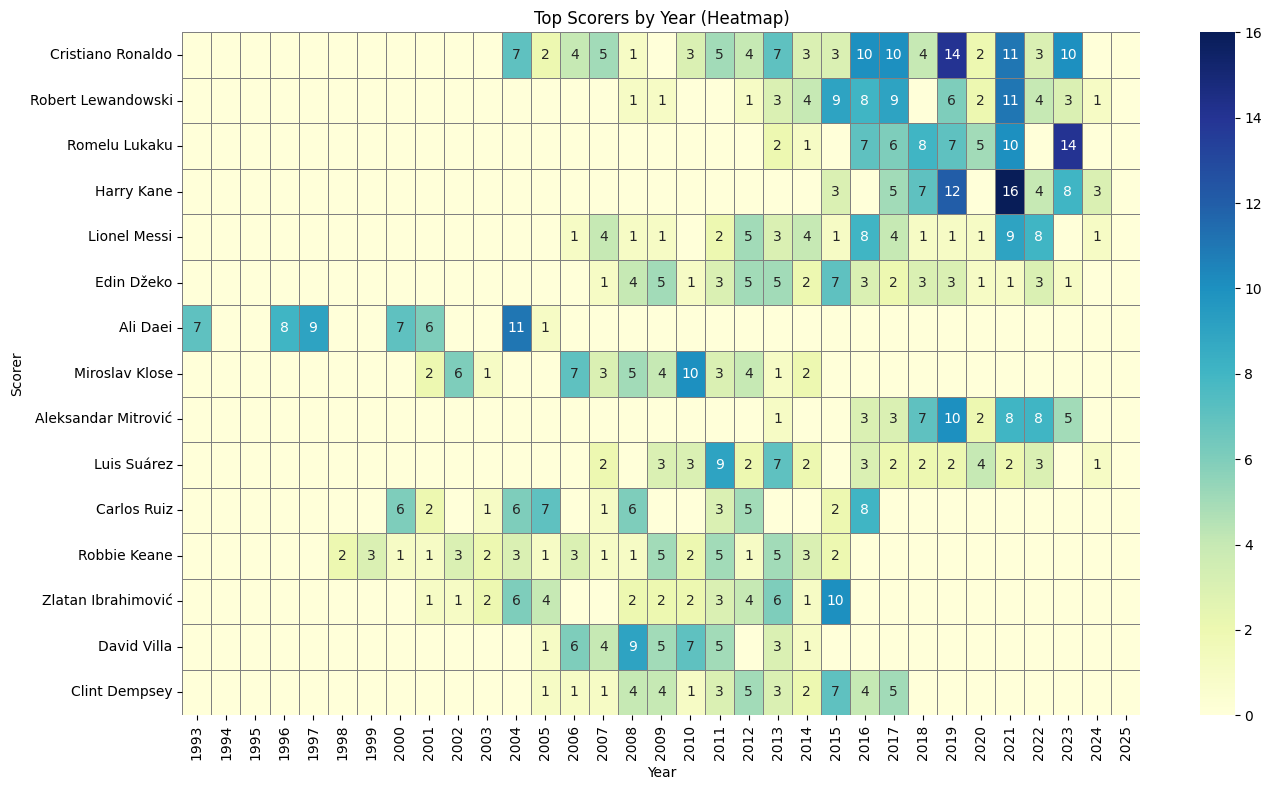

In [18]:
# Create an annotation matrix where 0 values are replaced with empty strings
# We convert the DataFrame to object type so we can insert strings instead of numbers
annot_matrix = scorer_year.T.astype(object)
annot_matrix[annot_matrix == 0] = ""

# Plot the heatmap for Player scoring activity by year
# Annotate the cells with the number of goals, skip zeros
plt.figure(figsize=(14, 8))
sns.heatmap(
    scorer_year.T,
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray',
    annot=annot_matrix,  # show only non-zero values as annotations
    fmt='',              # no number formatting needed
    cbar=True            # show color bar
)

plt.title('Top Scorers by Year (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Scorer')
plt.tight_layout()
plt.show()


In [19]:
# Count how many unique years each top scorer has scored in
years_per_scorer = top_scorers_data.groupby('scorer')['year'].nunique().sort_values(ascending=False)

# Display the number of different years each top scorer scored in
print("Number of years each top scorer has scored in:")
print(years_per_scorer)

# Identify the player with the highest number of scoring years
most_consistent_scorer = years_per_scorer.idxmax()
most_years = years_per_scorer.max()
print(f"\n Most consistent scorer over the years: {most_consistent_scorer} ({most_years} years)")

Number of years each top scorer has scored in:
scorer
Cristiano Ronaldo      19
Robbie Keane           18
Edin Džeko             17
Lionel Messi           17
Luis Suárez            15
Robert Lewandowski     14
Clint Dempsey          13
Zlatan Ibrahimović     13
Miroslav Klose         12
Carlos Ruiz            11
Aleksandar Mitrović     9
Romelu Lukaku           9
David Villa             9
Harry Kane              8
Ali Daei                7
Name: year, dtype: int64

 Most consistent scorer over the years: Cristiano Ronaldo (19 years)


# Get Matches details

In [20]:
# Create match ID
data['match_id'] = data['date'] + '_' + data['home_team'] + '_vs_' + data['away_team']

# Add goal column (1 per row = 1 goal)
data['goal'] = 1

# aggregate goals per team per match
match_goals = data.groupby(['match_id', 'team']).agg({'goal': 'sum'}).reset_index()

In [21]:
match_goals

,match_id,team,goal
0,1916-07-02_Chile_vs_Uruguay,Uruguay,4
1,1916-07-06_Argentina_vs_Chile,Argentina,6
2,1916-07-06_Argentina_vs_Chile,Chile,1
3,1916-07-08_Brazil_vs_Chile,Brazil,1
4,1916-07-08_Brazil_vs_Chile,Chile,1
...,...,...,...
21153,2025-07-02_Mexico_vs_Honduras,Mexico,1
21154,2025-07-02_United States_vs_Guatemala,Guatemala,1
21155,2025-07-02_United States_vs_Guatemala,United States,2
21156,2025-07-06_United States_vs_Mexico,Mexico,2


In [22]:
matches = data[['match_id', 'home_team', 'away_team']].drop_duplicates()

In [23]:
matches = matches.merge(match_goals, left_on=['match_id', 'home_team'], right_on=['match_id', 'team'], how='left')
matches = matches.rename(columns={'goal': 'home_goals'})

matches = matches.merge(match_goals, left_on=['match_id', 'away_team'], right_on=['match_id', 'team'], how='left')
matches = matches.rename(columns={'goal': 'away_goals'})


In [24]:
matches.head(6)

,match_id,home_team,away_team,team_x,home_goals,team_y,away_goals
0,1916-07-02_Chile_vs_Uruguay,Chile,Uruguay,NaN,NaN,Uruguay,4.0
1,1916-07-06_Argentina_vs_Chile,Argentina,Chile,Argentina,6.0,Chile,1.0
2,1916-07-08_Brazil_vs_Chile,Brazil,Chile,Brazil,1.0,Chile,1.0
3,1916-07-10_Argentina_vs_Brazil,Argentina,Brazil,Argentina,1.0,Brazil,1.0
4,1916-07-12_Brazil_vs_Uruguay,Brazil,Uruguay,Brazil,1.0,Uruguay,2.0
5,1917-09-30_Uruguay_vs_Chile,Uruguay,Chile,Uruguay,4.0,NaN,NaN


In [25]:
matches = matches[['match_id', 'home_team', 'away_team', 'home_goals', 'away_goals']].copy()
matches[['home_goals', 'away_goals']] = matches[['home_goals', 'away_goals']].fillna(0).astype(int)

In [26]:
matches.head(6)

,match_id,home_team,away_team,home_goals,away_goals
0,1916-07-02_Chile_vs_Uruguay,Chile,Uruguay,0,4
1,1916-07-06_Argentina_vs_Chile,Argentina,Chile,6,1
2,1916-07-08_Brazil_vs_Chile,Brazil,Chile,1,1
3,1916-07-10_Argentina_vs_Brazil,Argentina,Brazil,1,1
4,1916-07-12_Brazil_vs_Uruguay,Brazil,Uruguay,1,2
5,1917-09-30_Uruguay_vs_Chile,Uruguay,Chile,4,0


In [27]:
def get_result(row):
    if row['home_goals'] > row['away_goals']:
        return 'Home Win'
    elif row['home_goals'] < row['away_goals']:
        return 'Away Win'
    else:
        return 'Draw'

In [28]:
matches['result'] = matches.apply(get_result, axis=1)

In [29]:
matches.tail(6)

,match_id,home_team,away_team,home_goals,away_goals,result
14398,2025-06-28_Panama_vs_Honduras,Panama,Honduras,1,1,Draw
14399,2025-06-29_Canada_vs_Guatemala,Canada,Guatemala,1,1,Draw
14400,2025-06-29_United States_vs_Costa Rica,United States,Costa Rica,2,2,Draw
14401,2025-07-02_Mexico_vs_Honduras,Mexico,Honduras,1,0,Home Win
14402,2025-07-02_United States_vs_Guatemala,United States,Guatemala,2,1,Home Win
14403,2025-07-06_United States_vs_Mexico,United States,Mexico,1,2,Away Win


In [30]:
home_total = matches['home_goals'].sum()
away_total = matches['away_goals'].sum()
print(home_total,away_total)

26841 17606


In [31]:
matches['result'].value_counts()

result
Home Win    7722
Away Win    4517
Draw        2165
Name: count, dtype: int64

In [32]:
matches['date'] = matches['match_id'].str.extract(r'^(\d{4}-\d{2}-\d{2})')
matches['year'] = pd.to_datetime(matches['date']).dt.year

In [33]:
matches

,match_id,home_team,away_team,home_goals,away_goals,result,date,year
0,1916-07-02_Chile_vs_Uruguay,Chile,Uruguay,0,4,Away Win,1916-07-02,1916
1,1916-07-06_Argentina_vs_Chile,Argentina,Chile,6,1,Home Win,1916-07-06,1916
2,1916-07-08_Brazil_vs_Chile,Brazil,Chile,1,1,Draw,1916-07-08,1916
3,1916-07-10_Argentina_vs_Brazil,Argentina,Brazil,1,1,Draw,1916-07-10,1916
4,1916-07-12_Brazil_vs_Uruguay,Brazil,Uruguay,1,2,Away Win,1916-07-12,1916
...,...,...,...,...,...,...,...,...
14399,2025-06-29_Canada_vs_Guatemala,Canada,Guatemala,1,1,Draw,2025-06-29,2025
14400,2025-06-29_United States_vs_Costa Rica,United States,Costa Rica,2,2,Draw,2025-06-29,2025
14401,2025-07-02_Mexico_vs_Honduras,Mexico,Honduras,1,0,Home Win,2025-07-02,2025
14402,2025-07-02_United States_vs_Guatemala,United States,Guatemala,2,1,Home Win,2025-07-02,2025


In [34]:
matches.to_csv('international_matches_1916-2025.csv', index=False)

# Create New DataFrame for Nations Performance

In [35]:
df = matches.copy()
home = df[['home_team', 'home_goals', 'away_goals', 'result']].copy()
home.columns = ['team', 'goals_scored', 'goals_conceded', 'result']
home['is_home'] = True

away = df[['away_team', 'away_goals', 'home_goals', 'result']].copy()
away.columns = ['team', 'goals_scored', 'goals_conceded', 'result']
away['is_home'] = False

all_matches = pd.concat([home, away])

In [36]:
def get_result(row):
    if row['result'] == 'Draw':
        return 'draw'
    elif (row['result'] == 'Home Win' and row['is_home']) or \
         (row['result'] == 'Away Win' and not row['is_home']):
        return 'win'
    else:
        return 'loss'

In [37]:
# Create the outcome of matches for teams
all_matches['outcome'] = all_matches.apply(get_result, axis=1)

wins = all_matches[all_matches['outcome'] == 'win']['team'].value_counts().rename('wins')
losses = all_matches[all_matches['outcome'] == 'loss']['team'].value_counts().rename('losses')
draws = all_matches[all_matches['outcome'] == 'draw']['team'].value_counts().rename('draws')

In [38]:
# matches played and goals scored or conceded
matches_played = all_matches['team'].value_counts().rename('matches_played')
goals_scored = all_matches.groupby('team')['goals_scored'].sum()
goals_conceded = all_matches.groupby('team')['goals_conceded'].sum()

In [39]:
nations = pd.concat([matches_played, goals_scored, goals_conceded, wins, losses, draws], axis=1).fillna(0)
nations = nations.astype(int)
nations = nations.reset_index().rename(columns={'index': 'team'})

In [40]:
# wins of home team nominally
home_matches = all_matches[all_matches['is_home'] == True]

home_wins = home_matches[home_matches['outcome'] == 'win']['team'].value_counts().rename('home_wins')
home_losses = home_matches[home_matches['outcome'] == 'loss']['team'].value_counts().rename('home_losses')
home_draws = home_matches[home_matches['outcome'] == 'draw']['team'].value_counts().rename('home_draws')

In [41]:
nations = pd.concat([
    nations.set_index('team'),
    home_wins, home_losses, home_draws], axis=1).fillna(0).astype(int).reset_index()

In [42]:
nations

,team,matches_played,goals_scored,goals_conceded,wins,losses,draws,home_wins,home_losses,home_draws
0,Brazil,442,1051,426,298,85,59,216,36,35
1,Argentina,430,948,442,274,85,71,215,34,41
2,Uruguay,428,804,510,231,132,65,117,26,34
3,Mexico,393,862,406,246,97,50,157,30,21
4,Spain,387,894,335,260,69,58,146,21,25
...,...,...,...,...,...,...,...,...,...,...
215,Eritrea,8,4,20,0,7,1,0,2,1
216,South Sudan,4,2,7,0,2,2,0,0,2
217,Yemen DPR,4,4,16,0,3,1,0,1,0
218,Saarland,3,4,8,1,2,0,0,1,0


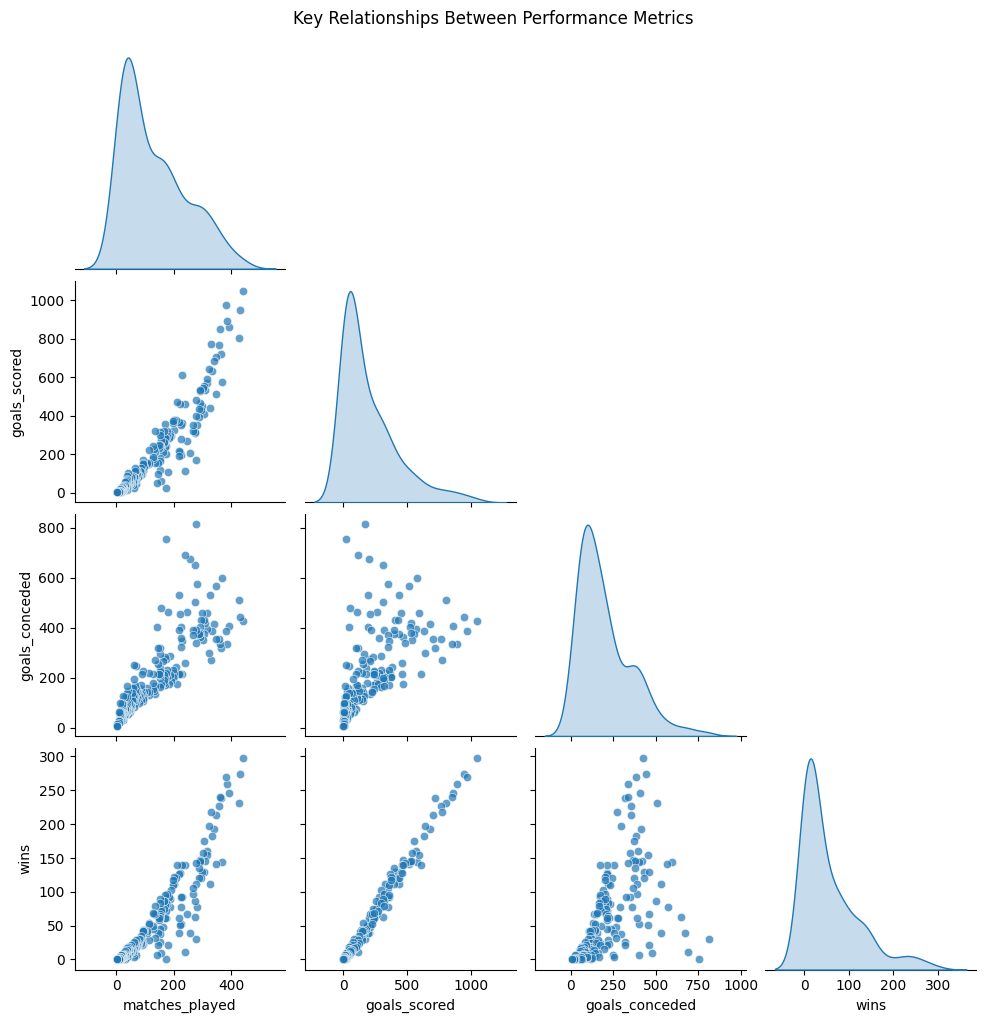

In [43]:
sns.pairplot(nations[['matches_played', 'goals_scored', 'goals_conceded', 'wins']],
                kind='scatter', diag_kind='kde', plot_kws={'alpha': 0.7}, corner=True)
plt.suptitle("Key Relationships Between Performance Metrics", y=1.02)
plt.show()

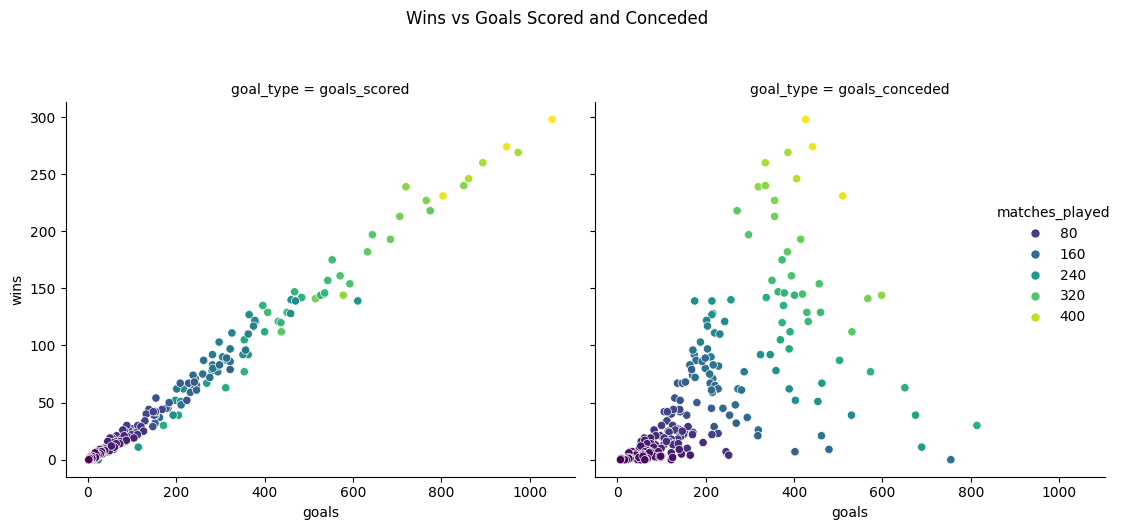

In [44]:
plot_data = nations.melt(
    id_vars=['team', 'wins', 'matches_played'],
    value_vars=['goals_scored', 'goals_conceded'],
    var_name='goal_type',
    value_name='goals'
)

sns.relplot(
    data=plot_data,
    x='goals',
    y='wins',
    hue='matches_played',
    col='goal_type',
    kind='scatter',
    palette='viridis',
    col_order=['goals_scored', 'goals_conceded'],
    height=5,
    aspect=1
)

plt.suptitle('Wins vs Goals Scored and Conceded', y=1.05)
plt.tight_layout()
plt.show()


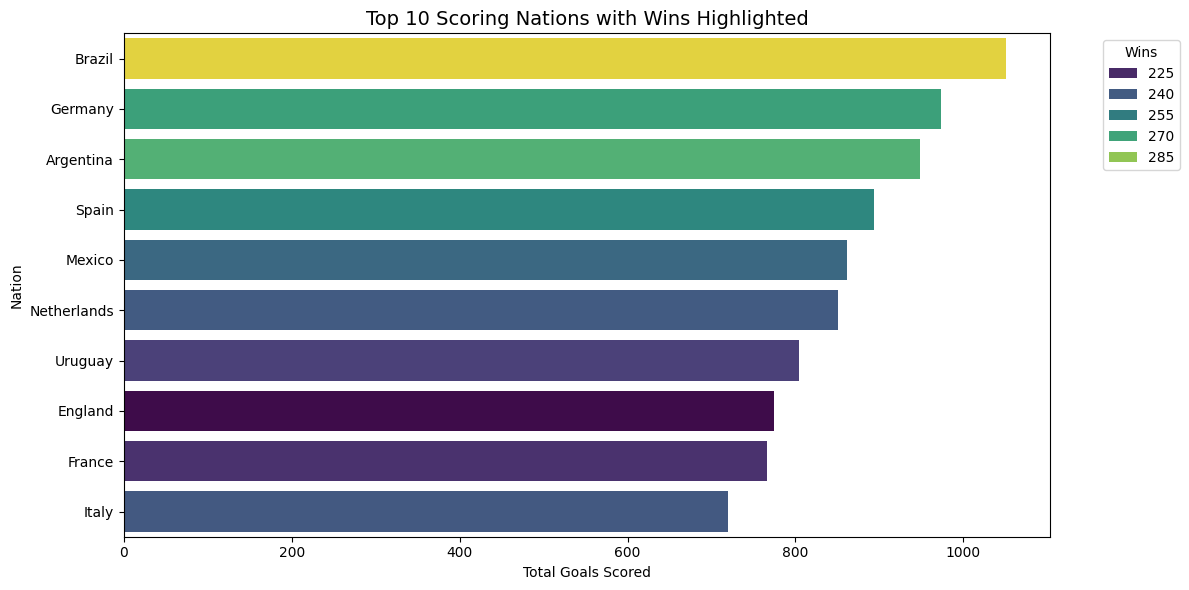

In [45]:
# Sort by goals and take top 10
top_goals = nations.sort_values(by='goals_scored', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_goals, x='goals_scored', y='team', hue='wins', dodge=False, palette='viridis')

# Titles and labels
plt.title("Top 10 Scoring Nations with Wins Highlighted", fontsize=14)
plt.xlabel("Total Goals Scored")
plt.ylabel("Nation")
plt.legend(title="Wins", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Insights

### Nations Performance

In [46]:
data.tail()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,opponent,year,match_id,goal
44442,2025-07-02,United States,Guatemala,United States,Diego Luna,15.0,False,False,Guatemala,2025,2025-07-02_United States_vs_Guatemala,1
44443,2025-07-02,United States,Guatemala,Guatemala,Olger Escobar,80.0,False,False,United States,2025,2025-07-02_United States_vs_Guatemala,1
44444,2025-07-06,United States,Mexico,United States,Chris Richards,4.0,False,False,Mexico,2025,2025-07-06_United States_vs_Mexico,1
44445,2025-07-06,United States,Mexico,Mexico,Raúl Jiménez,27.0,False,False,United States,2025,2025-07-06_United States_vs_Mexico,1
44446,2025-07-06,United States,Mexico,Mexico,Edson Álvarez,77.0,False,False,United States,2025,2025-07-06_United States_vs_Mexico,1


In [47]:
goal_counts = data.groupby(['team', 'minute']).size().reset_index(name='goal_count')

# top 10
top_teams = data['team'].value_counts().head(10).index
goal_counts_top = goal_counts[goal_counts['team'].isin(top_teams)]

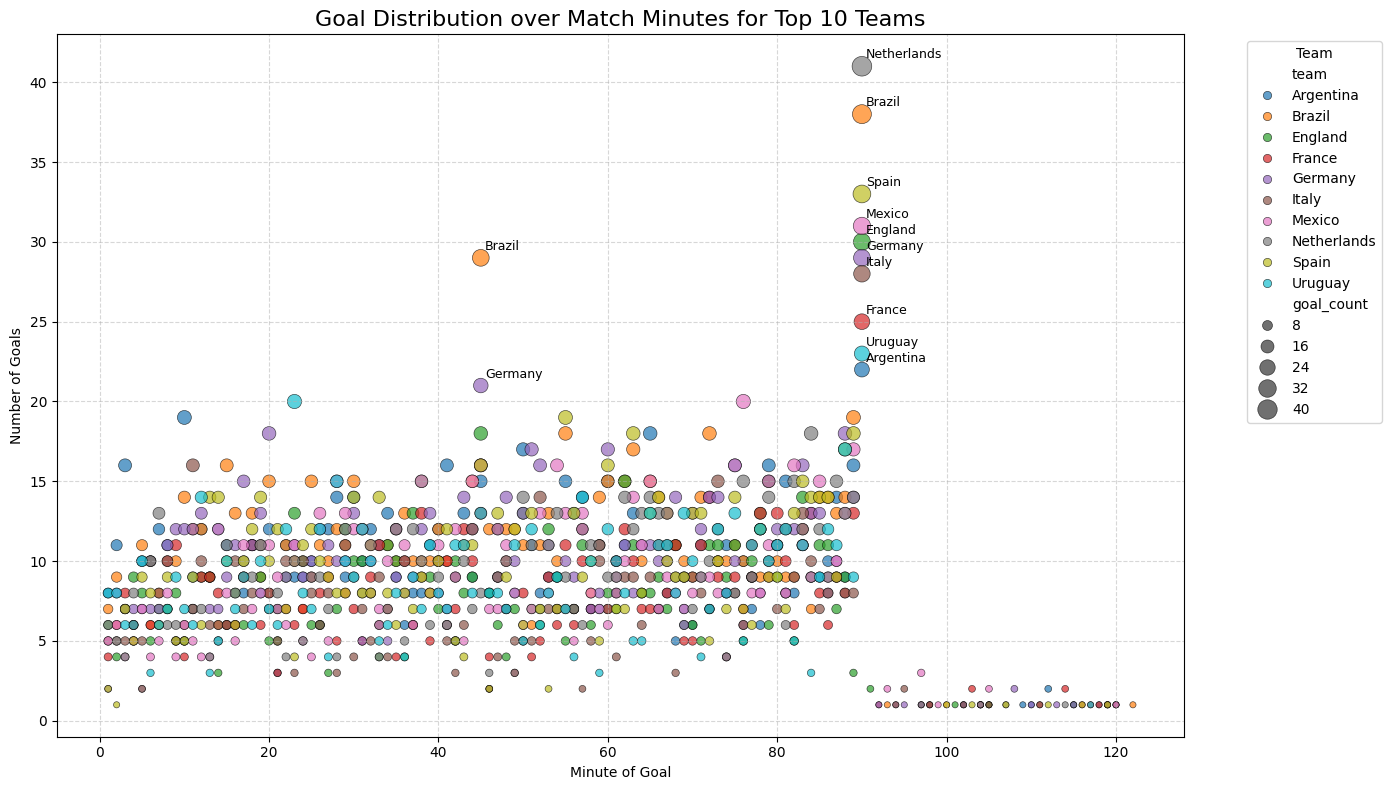

In [48]:
# scatter plot
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=goal_counts_top,
    x='minute',
    y='goal_count',
    hue='team',
    size='goal_count',
    sizes=(20, 200),
    alpha=0.7,
    palette='tab10',
    edgecolor='black'
)

# labels
for _, row in goal_counts_top.iterrows():
    if row['goal_count'] > 20:
        plt.text(
            row['minute'] + 0.5,  # slight shift to the right
            row['goal_count'] + 0.5,  # slight shift upward
            row['team'],
            fontsize=9,
            color='black'
        )

plt.title('Goal Distribution over Match Minutes for Top 10 Teams', fontsize=16)
plt.xlabel('Minute of Goal')
plt.ylabel('Number of Goals')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Most Dramatic Matches

In [49]:
# taking kead by score 
def lead(lisa):
    score_leading_change = 0
    for i in range(1, len(lisa)):
        if lisa[i] != lisa[i - 1]:
            score_leading_change = score_leading_change+1
    return score_leading_change

In [50]:
def comeback(lisa):
    if not lisa:
        return 0

    # Identify the two teams
    unique_teams = []
    for team in lisa:
        if team not in unique_teams:
            unique_teams.append(team)
    if len(unique_teams) < 2:
        return 0  # Only one team scored
    
    # Convert scorers to +1/-1
    converted = [1 if team == unique_teams[0] else -1 for team in lisa]
    
    # Track cumulative score after each goal
    cumulative = []
    total = 0
    for num in converted:
        total += num
        cumulative.append(total)

    # Count sign changes (ignoring 0 to avoid miscounting equal moments)
    change_count = 0
    prev = cumulative[0]
    for current in cumulative[1:]:
        if prev * current < 0:  # sign changed (positive to negative or vice versa)
            change_count += 1
        if current != 0:
            prev = current

    return change_count


In [51]:
# Ensure 'minute' column is numeric
data['minute'] = pd.to_numeric(data['minute'], errors='coerce')

# Prepare lists to store results for each match
late_goals_list = []
lead_changes_list = []
comeback_list = []

In [52]:
# Loop through each match and apply the pre-defined functions
for idx, row in matches.iterrows():
    match_id = row['match_id']
    goals = data[data['match_id'] == match_id].sort_values(by='minute')
    scorers = goals['team'].tolist()

    late_goals_list.append(goals[goals['minute'] >= 80].shape[0])  # Count of late goals (80+)
    lead_changes_list.append(lead(scorers))                         # Number of lead changes
    comeback_list.append(comeback(scorers))                         # Comeback score

In [53]:
# Add the new columns to the matches DataFrame
matches['late_goals'] = late_goals_list
matches['lead_changes'] = lead_changes_list
matches['comebacks'] = comeback_list

In [54]:
matches.tail()

,match_id,home_team,away_team,home_goals,away_goals,result,date,year,late_goals,lead_changes,comebacks
14399,2025-06-29_Canada_vs_Guatemala,Canada,Guatemala,1,1,Draw,2025-06-29,2025,0,1,0
14400,2025-06-29_United States_vs_Costa Rica,United States,Costa Rica,2,2,Draw,2025-06-29,2025,0,2,1
14401,2025-07-02_Mexico_vs_Honduras,Mexico,Honduras,1,0,Home Win,2025-07-02,2025,0,0,0
14402,2025-07-02_United States_vs_Guatemala,United States,Guatemala,2,1,Home Win,2025-07-02,2025,1,1,0
14403,2025-07-06_United States_vs_Mexico,United States,Mexico,1,2,Away Win,2025-07-06,2025,0,1,1


In [55]:
# dramtic condtion one
dco = matches[matches['late_goals']>=2] 
# dramtic condtion two
dct = dco[dco['lead_changes']>2]
# dramtic condtion three
dctt = dct[dct['comebacks']>1]

In [56]:
# Most Dramatic Matches
dctt

,match_id,home_team,away_team,home_goals,away_goals,result,date,year,late_goals,lead_changes,comebacks
1565,1970-06-17_Germany_vs_Italy,Germany,Italy,3,4,Away Win,1970-06-17,1970,6,4,2
6056,2000-04-08_Uganda_vs_Guinea,Uganda,Guinea,4,4,Draw,2000-04-08,2000,3,3,2
7534,2004-08-03_Bahrain_vs_Japan,Bahrain,Japan,3,4,Away Win,2004-08-03,2004,3,3,3
9567,2010-10-12_Belgium_vs_Austria,Belgium,Austria,4,4,Draw,2010-10-12,2010,3,5,2
11059,2015-07-15_Trinidad and Tobago_vs_Mexico,Trinidad and Tobago,Mexico,4,4,Draw,2015-07-15,2015,3,3,2
11534,2016-09-06_Bulgaria_vs_Luxembourg,Bulgaria,Luxembourg,4,3,Home Win,2016-09-06,2016,2,3,2
11968,2017-10-07_Bosnia and Herzegovina_vs_Belgium,Bosnia and Herzegovina,Belgium,3,4,Away Win,2017-10-07,2017,2,4,2
14250,2024-01-25_South Korea_vs_Malaysia,South Korea,Malaysia,3,3,Draw,2024-01-25,2024,3,3,2
